## Kmeans and PCA to understand Smoking Behaviour 

The purpose of this project was to analyze a dataset related to smoking behavior and associated traits using clustering and statistical methods, identifying key patterns and correlations for actionable insights.

Steps Taken
1. Data Cleaning and Preprocessing:
    Dropped irrelevant columns like "Sector" and "Last page".
    Handled missing values by filling them with the median for numerical features or "Unknown" for categorical features.
    Encoded categorical variables into numeric values using LabelEncoder.

2. Clustering Analysis:

    Used the KMeans algorithm to cluster individuals based on their traits.
    Applied the Elbow Method to determine the optimal number of clusters (6 clusters).
    Calculated the Silhouette Score to evaluate cluster quality.

3. Dimensionality Reduction:

    Reduced the dimensionality of the data using Principal Component Analysis (PCA) for visualization in 2D space.
    Visualized clusters in PCA space to examine separability and cohesion.

4. Cluster Insights:

    Computed feature averages for each cluster to understand the defining characteristics of each group.
    Created heatmaps of normalized feature averages to visually compare clusters.

5. Correlation Analysis:

    Investigated correlations between smoking behavior and key features such as stress, age, marital status, and employment status.
    Used:
    Chi-Square test for categorical features.

6. Visualizations:

    Bar plots, scatter plots, and heatmaps were used to visualize:
    Correlations of features with smoking.
    Distribution of features within clusters.
    Statistical relationships between traits and smoking.

In [ ]:
#Import Libraries 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import f_oneway, chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

### LOAD The DATA

In [ ]:
# Load the Excel file
file_path = "C:\\Users\\hsk21\\Desktop\\MLcourse\\github\\hacathon\\2024_PersonalityTraits_SurveyData.xls"
data = pd.ExcelFile(file_path)
df = data.parse(data.sheet_names[0])

# Clean the data
df_cleaned = df.drop(columns=["Sector", "Last page"])  # Drop irrelevant columns


In [3]:
# Handle missing values
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna("Unknown")  # Fill missing categorical values with 'Unknown'

for col in numerical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())  # Fill missing numerical values with median


In [4]:
# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

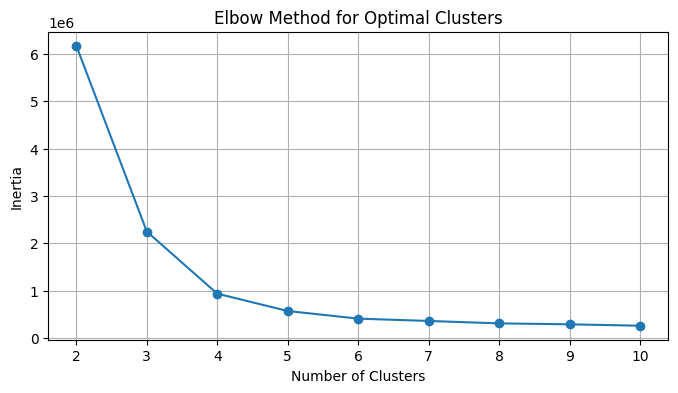

In [ ]:
#Determine Optimal Clusters Using Elbow Method
encoded_data = df_cleaned.copy()

inertia = []
K = range(2, 11)  # Test for 2 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker="o")
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
#  Apply KMeans with 6 Clusters based on elbow method above 
optimal_clusters = 6
encoded_data = df_cleaned.copy()

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(encoded_data)

# Add descriptive labels to clusters
cluster_labels = {
    0: "Cluster 0: High Openness, Low Neuroticism",
    1: "Cluster 1: Moderate Extroversion, High Agreeableness",
    2: "Cluster 2: Low Openness, High Conscientiousness",
    3: "Cluster 3: Balanced Traits",
    4: "Cluster 4: High Stress, Low Income",
    5: "Cluster 5: Moderate Traits, High Smoking"
}
df_cleaned['Cluster_Label'] = df_cleaned['Cluster'].map(cluster_labels)

In [ ]:
# Calculate Silhouette Score ranges from -1 to 1 : -1 refers to poor clustering and 1 refers to perfect clustering here we got a value of 0.5172
silhouette_avg = silhouette_score(encoded_data, df_cleaned['Cluster'])
print(f"\nAverage Silhouette Score for {optimal_clusters} Clusters: {silhouette_avg:.4f}")


Average Silhouette Score for 6 Clusters: 0.5172


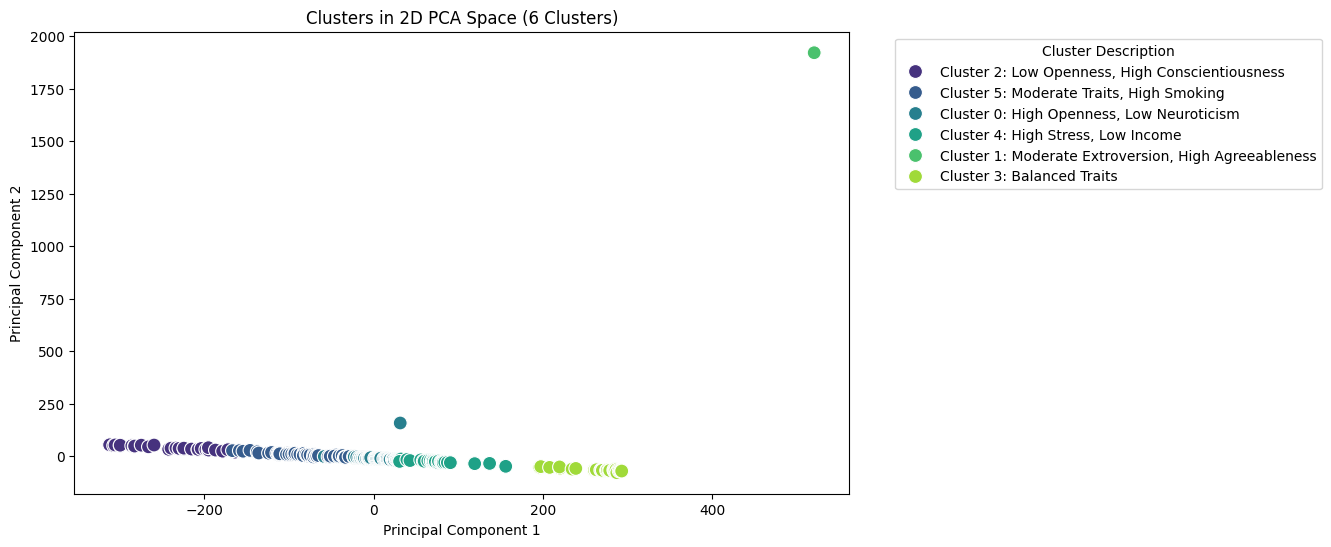

In [ ]:
#PCA for Dimensionality Reduction and Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(encoded_data)
df_cleaned['PCA1'] = reduced_data[:, 0]
df_cleaned['PCA2'] = reduced_data[:, 1]

# Plot clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster_Label', data=df_cleaned, palette='viridis', s=100
)
plt.title('Clusters in 2D PCA Space (6 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



Cluster Summary Statistics:
          Unnamed: 0  \
Cluster               
0        321.682540   
1        436.000000   
2         80.866667   
3        592.500000   
4        399.935484   
5        233.000000   

         Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?  \
Cluster                                                                                                                   
0                                                      0.0                                                                
1                                                      0.0                                                                
2                                                      0.0                                                                
3                                                      0.0                                                                
4                                              

C:\Users\hsk21\AppData\Local\Temp\ipykernel_8004\4020585344.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


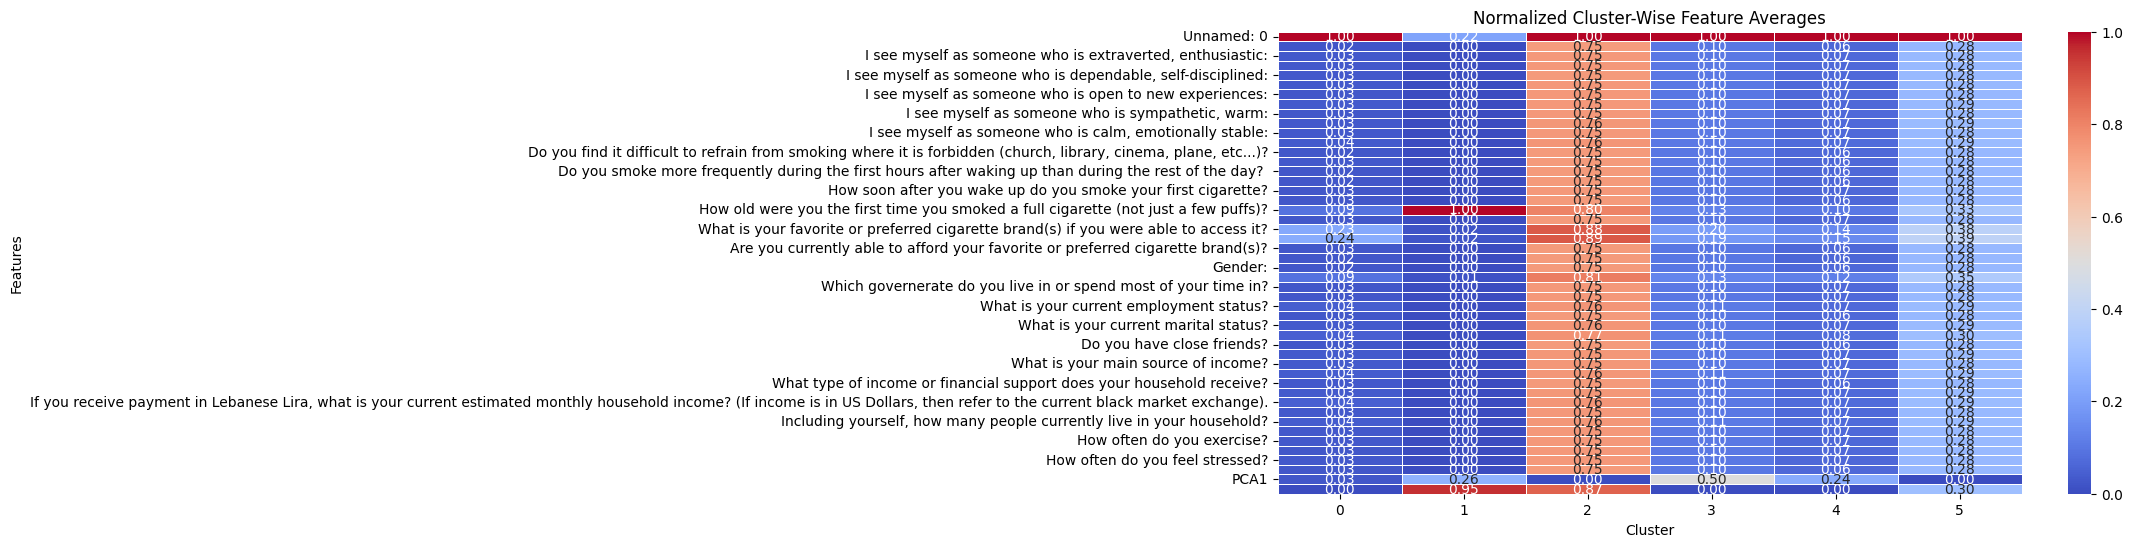

In [ ]:
# Cluster Insights
# Filter numeric columns for cluster summary
numeric_columns = df_cleaned.select_dtypes(include=['int64', 'float64']).columns
cluster_summary = df_cleaned[numeric_columns].groupby(df_cleaned['Cluster']).mean()
print("\nCluster Summary Statistics:\n", cluster_summary)

# Normalize the cluster summary for better visual comparison


scaler = MinMaxScaler()
normalized_summary = pd.DataFrame(
    scaler.fit_transform(cluster_summary.T),  # Normalize across features
    index=cluster_summary.columns,  # Features as rows
    columns=cluster_summary.index  # Clusters as columns
)

# Visualize the normalized cluster summary using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_summary, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Normalized Cluster-Wise Feature Averages')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [ ]:
# Statistical Analysis
# ANOVA for numerical features
anova_results = {}
for feature in numerical_cols:
    if feature in df_cleaned.columns:
        groups = [df_cleaned[df_cleaned['Cluster'] == cluster][feature] for cluster in df_cleaned['Cluster'].unique()]
        f_stat, p_value = f_oneway(*groups)
        anova_results[feature] = p_value

print("\nANOVA Results:")
for feature, p_value in anova_results.items():
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"{feature}: {significance} (P-Value = {p_value:.4f})")



ANOVA Results:
Unnamed: 0: Significant (P-Value = 0.0000)
How old were you the first time you smoked a full cigarette (not just a few puffs)?: Significant (P-Value = 0.0000)
How old are you?: Significant (P-Value = 0.0000)
Of the five closest friends or acquaintances that you spend time with on a regular basis, how many of them are smokers?: Not Significant (P-Value = 0.3065)
Including yourself, how many people currently live in your household?: Significant (P-Value = 0.0013)


In [11]:
# Chi-Square for categorical features
chi_square_results = {}
categorical_features = [col for col in categorical_cols if col != 'Cluster']
for feature in categorical_features:
    if feature in df_cleaned.columns:
        contingency_table = pd.crosstab(df_cleaned['Cluster'], df_cleaned[feature])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi_square_results[feature] = p_value

print("\nChi-Square Results:")
for feature, p_value in chi_square_results.items():
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"{feature}: {significance} (P-Value = {p_value:.4f})")



Chi-Square Results:
Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?: Not Significant (P-Value = 1.0000)
I see myself as someone who is extraverted, enthusiastic:: Significant (P-Value = 0.0247)
I see myself as someone who is critical, quarrelsome:: Not Significant (P-Value = 0.1471)
I see myself as someone who is dependable, self-disciplined:: Not Significant (P-Value = 0.0533)
I see myself as someone who is anxious, easily upset:: Significant (P-Value = 0.0022)
I see myself as someone who is open to new experiences:: Not Significant (P-Value = 0.4961)
I see myself as someone who is reserved, quiet:: Significant (P-Value = 0.0003)
I see myself as someone who is sympathetic, warm:: Not Significant (P-Value = 0.1211)
I see myself as someone who is disorganized, careless:: Not Significant (P-Value = 0.1267)
I see myself as someone who is calm, emotionally stable:: Not Significant (P-Value = 0.0812)
I see myself as someone who

C:\Users\hsk21\AppData\Local\Temp\ipykernel_8004\798166181.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


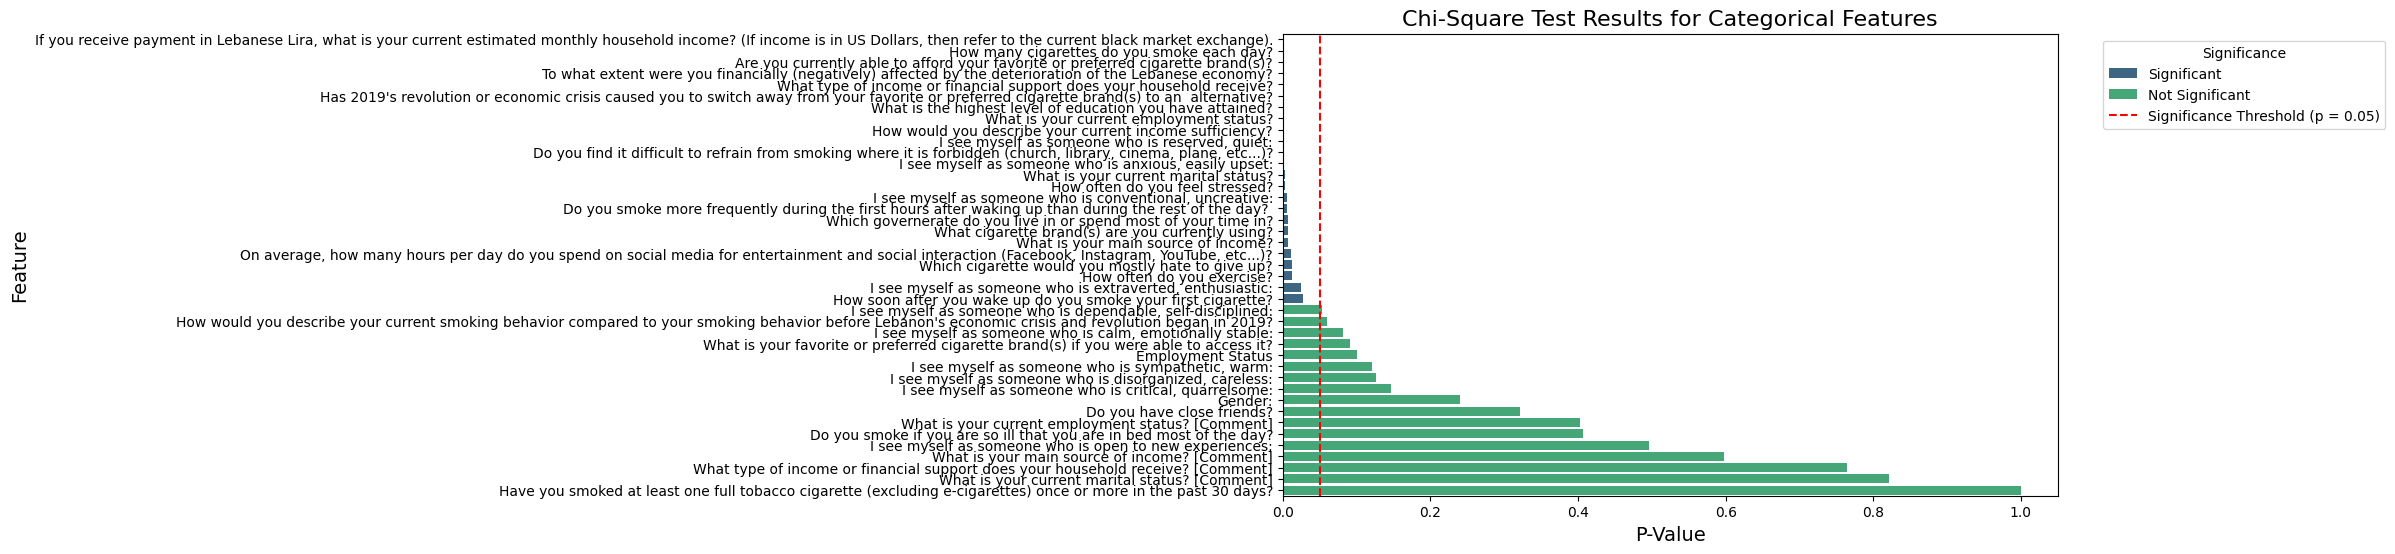

In [12]:
# Convert Chi-Square results into a DataFrame for easier visualization
chi_square_df = pd.DataFrame.from_dict(chi_square_results, orient='index', columns=['P-Value']).reset_index()
chi_square_df.rename(columns={'index': 'Feature'}, inplace=True)
chi_square_df['Significance'] = chi_square_df['P-Value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')

# Sort by P-Value for better visualization
chi_square_df.sort_values(by='P-Value', inplace=True)

# Create a bar chart for P-Values
plt.figure(figsize=(10, 6))
sns.barplot(x='P-Value', y='Feature', hue='Significance', data=chi_square_df, dodge=False, palette='viridis')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (p = 0.05)')
plt.title('Chi-Square Test Results for Categorical Features', fontsize=16)
plt.xlabel('P-Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.legend(title='Significance', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

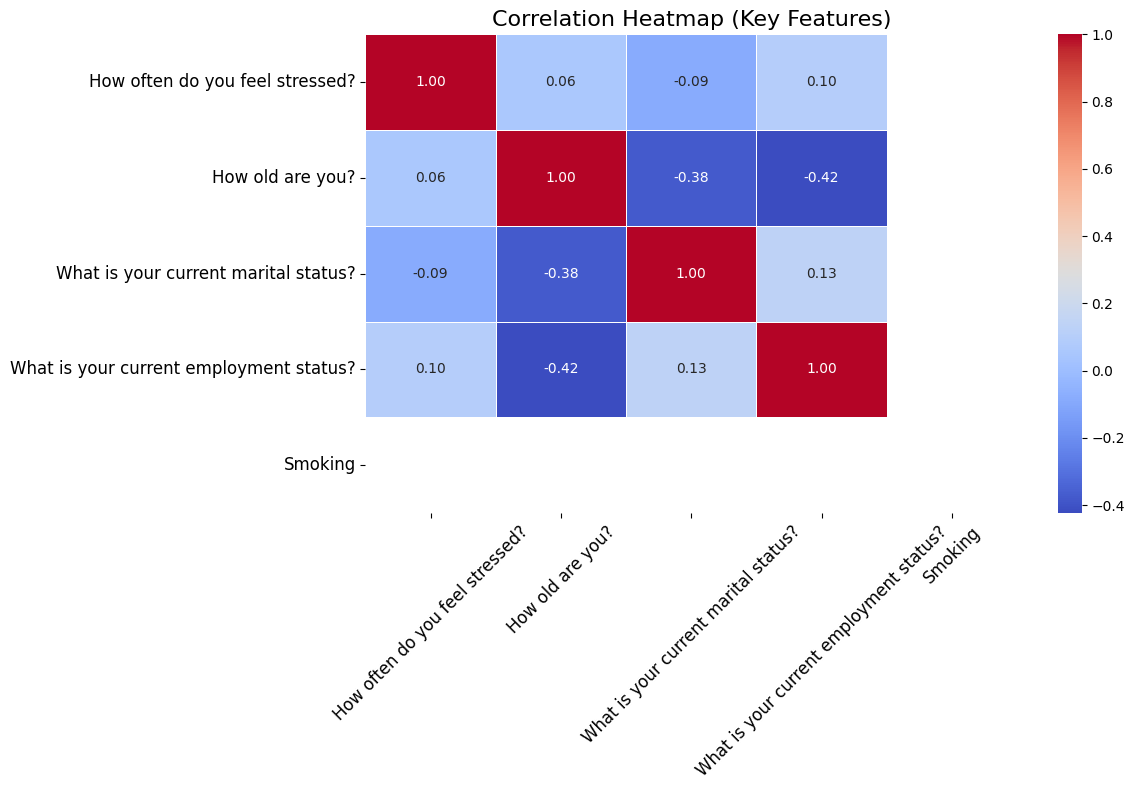

In [13]:
# Check for Smoking column and ensure it's included
smoking_column = 'Have you smoked at least one full tobacco cigarette (excluding e-cigarettes) once or more in the past 30 days?'
if smoking_column in df_cleaned.columns:
    df_cleaned.rename(columns={smoking_column: 'Smoking'}, inplace=True)
    df_cleaned['Smoking'] = df_cleaned['Smoking'].map({'Yes': 1, 'No': 0})

# Selected features
selected_features = ['How often do you feel stressed?', 'How old are you?', 
                     'What is your current marital status?', 'What is your current employment status?', 'Smoking']

# Verify that all selected features exist
existing_features = [feature for feature in selected_features if feature in df_cleaned.columns]
missing_features = [feature for feature in selected_features if feature not in df_cleaned.columns]

if missing_features:
    print(f"Missing features: {missing_features}. Adjusting selected features.")
selected_features = existing_features

# Prepare DataFrame for correlation analysis
df_corr = df_cleaned[selected_features].copy()

# Encode categorical features
label_cols = ['What is your current marital status?', 'What is your current employment status?']
for col in label_cols:
    if col in df_corr.columns:
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col])

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap (Key Features)', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()


C:\Users\hsk21\AppData\Local\Temp\ipykernel_8004\3696388057.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


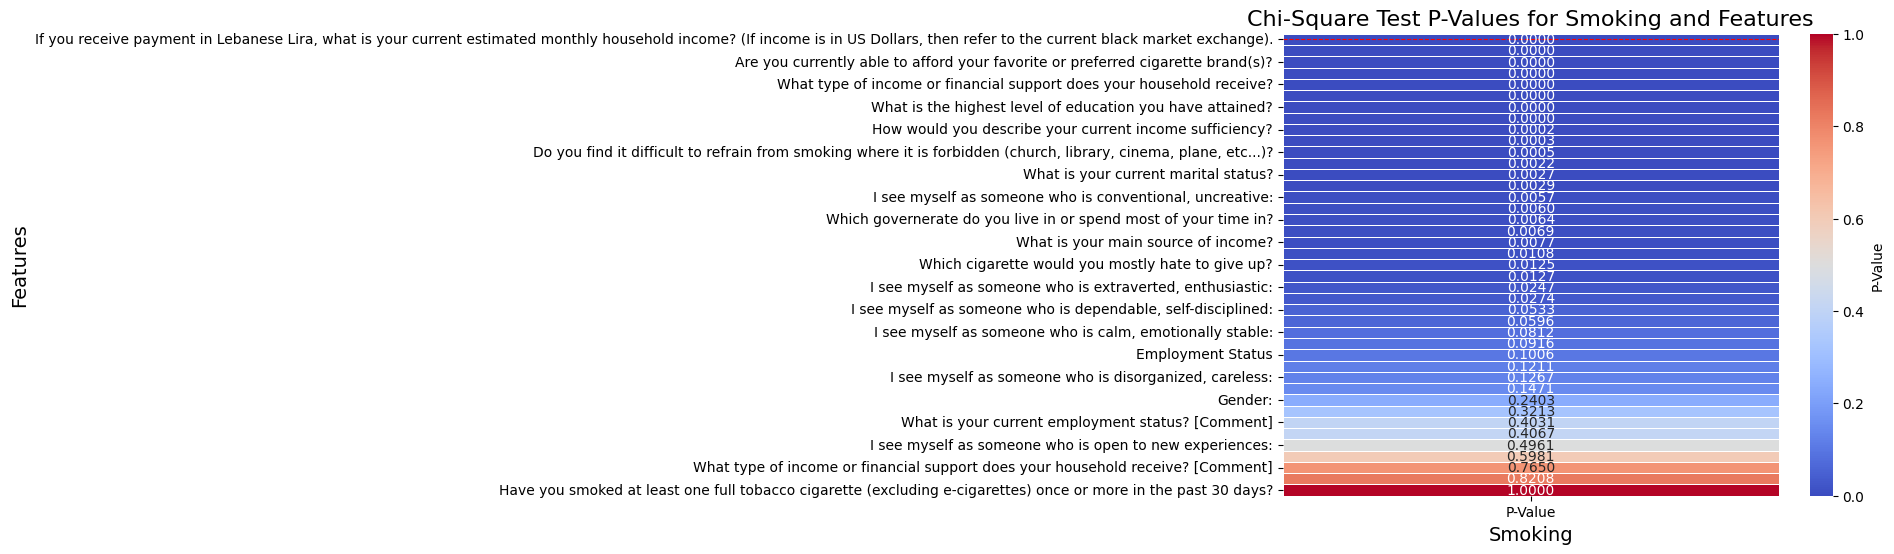


Significant Features (P-Value < 0.05):
                                              Feature       P-Value  \
34  If you receive payment in Lebanese Lira, what ...  6.609233e-17   
12         How many cigarettes do you smoke each day?  1.215813e-10   
20  Are you currently able to afford your favorite...  3.856270e-09   
36  To what extent were you financially (negativel...  5.555918e-08   
32  What type of income or financial support does ...  6.260475e-08   
21  Has 2019's revolution or economic crisis cause...  5.318897e-07   
24  What is the highest level of education you hav...  1.013283e-06   
25            What is your current employment status?  1.518625e-05   
35  How would you describe your current income suf...  2.372455e-04   
6     I see myself as someone who is reserved, quiet:  3.060382e-04   
11  Do you find it difficult to refrain from smoki...  4.966770e-04   
4   I see myself as someone who is anxious, easily...  2.150094e-03   
27               What is your current

In [15]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    chi_square_df[['P-Value']].set_index(chi_square_df['Feature']),
    annot=True,
    cmap='coolwarm',
    fmt=".4f",
    linewidths=0.5,
    cbar_kws={'label': 'P-Value'}
)
plt.axhline(y=0.5, color='red', linestyle='--', label='Significance Threshold (p = 0.05)', linewidth=0.8)
plt.title('Chi-Square Test P-Values for Smoking and Features', fontsize=16)
plt.xlabel('Smoking', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

# Print significant features
print("\nSignificant Features (P-Value < 0.05):")
significant_features = chi_square_df[chi_square_df['P-Value'] < 0.05]
print(significant_features)

In [16]:
# Save clustered data with labels
output_file = "C:\\Users\\hsk21\\Desktop\\clustered_data_with_6_clusters.xlsx"
df_cleaned.to_excel(output_file, index=False)
print(f"\nClustered data with 6 clusters saved to {output_file}")


Clustered data with 6 clusters saved to C:\Users\hsk21\Desktop\clustered_data_with_6_clusters.xlsx


C:\Users\hsk21\AppData\Local\Temp\ipykernel_8004\4247594020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Label', y=feature, data=df_cleaned, palette='viridis')


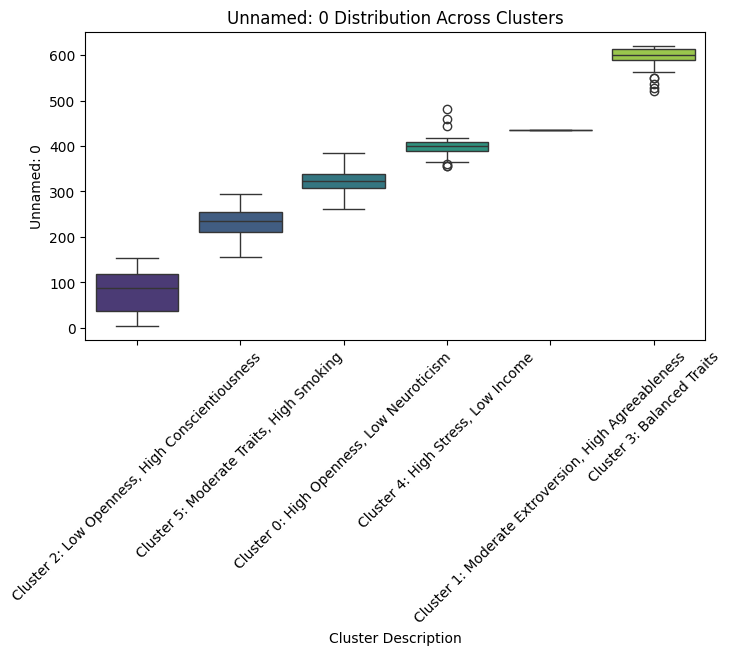

C:\Users\hsk21\AppData\Local\Temp\ipykernel_8004\4247594020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Label', y=feature, data=df_cleaned, palette='viridis')


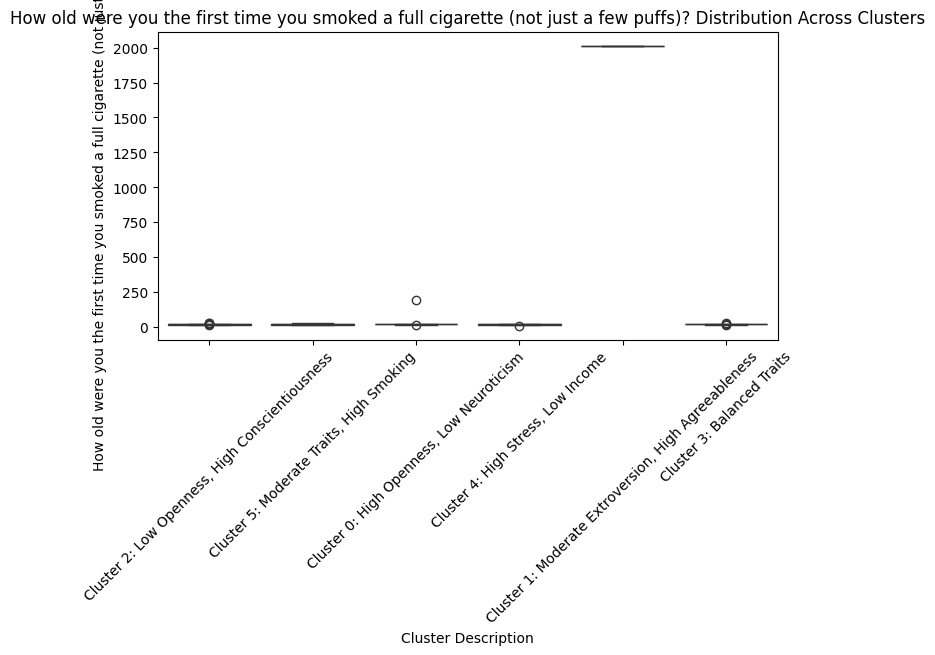

C:\Users\hsk21\AppData\Local\Temp\ipykernel_8004\4247594020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_Label', y=feature, data=df_cleaned, palette='viridis')


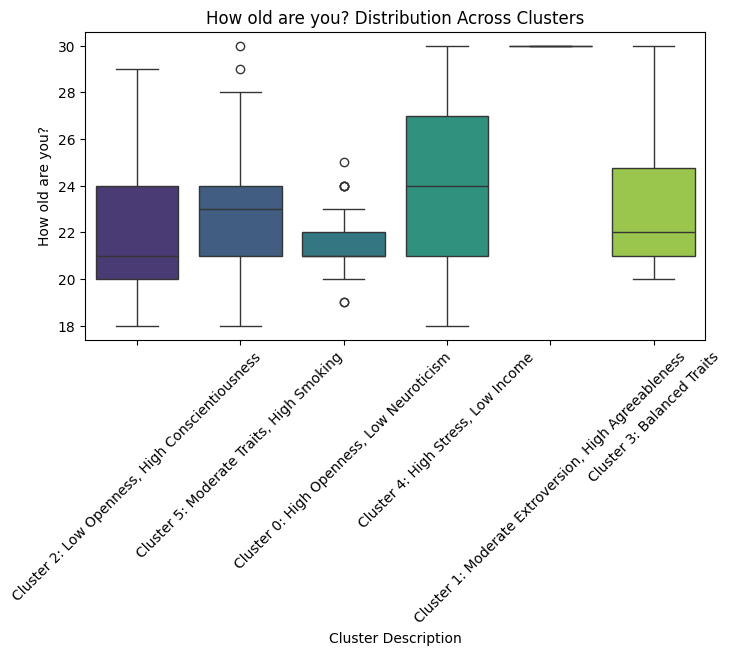

In [ ]:
# Key Feature Distribution
# Visualize distribution of a few important features
important_features = numerical_cols[:3]  # Replace with specific features if needed
for feature in important_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster_Label', y=feature, data=df_cleaned, palette='viridis')
    plt.title(f'{feature} Distribution Across Clusters')
    plt.xlabel('Cluster Description')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
    plt.show()
